In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dfcompleto = pd.read_csv('/content/drive/MyDrive/Datasc/PI/datoscompletos.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dfcompleto.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating_x,duration,...,description,platform,ID,duration_int,duration_type,userId,rating_y,timestamp,movieId,scored
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,...,a small fishing village must procure a local d...,amazon,as1,113,min,543,5.0,2003/07/30,as1,3.467131
1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,...,a small fishing village must procure a local d...,amazon,as1,113,min,595,3.0,1996/08/13,as1,3.467131
2,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,...,a small fishing village must procure a local d...,amazon,as1,113,min,611,3.0,2001/01/03,as1,3.467131
3,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,...,a small fishing village must procure a local d...,amazon,as1,113,min,2523,3.5,2012/06/25,as1,3.467131
4,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,...,a small fishing village must procure a local d...,amazon,as1,113,min,3082,4.0,2000/03/30,as1,3.467131


In [ ]:
dfml = dfcompleto

In [ ]:
#armar df para el modelo de ml quitando columnas que no necesito
dfml = dfml.drop(columns=['release_year', 'director','country','date_added','rating_x','duration','description','show_id','timestamp'])

In [ ]:
dfml.shape

(8473430, 12)

In [ ]:
#Analisis de valores nulos
dfml.isnull().sum()

type             0
title            0
cast             0
listed_in        0
platform         0
ID               0
duration_int     0
duration_type    0
userId           0
rating_y         0
movieId          0
scored           0
dtype: int64

In [ ]:
#eliminar las filas con valores nulos en la columna cast ya que no me sirven para entrenar el modelo
dfml = dfml.dropna(subset=['cast'])

In [ ]:
#reemplazar valores nulos de la columna duration_type por 'desconocido' 
dfml[['duration_type']] = dfml[['duration_type']].fillna('desconocido')

In [ ]:
# calcular la matriz de correlación
corr_matrix = dfml.corr()

# ver la matriz de correlación
print(corr_matrix)

              duration_int    userId  rating_y    scored
duration_int      1.000000  0.000061 -0.000391 -0.008578
userId            0.000061  1.000000  0.004607  0.000724
rating_y         -0.000391  0.004607  1.000000  0.045625
scored           -0.008578  0.000724  0.045625  1.000000


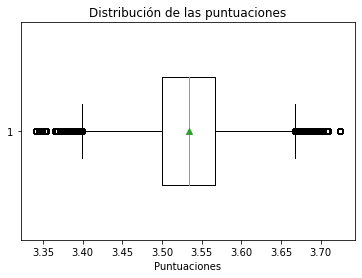

In [ ]:
# crear un boxplot de las puntuaciones para detectar outliers
fig, ax = plt.subplots()
ax.boxplot(dfml['scored'], vert=False, widths=0.5, showfliers=True, showmeans=True)
ax.set_title('Distribución de las puntuaciones')
ax.set_xlabel('Puntuaciones')
plt.show()

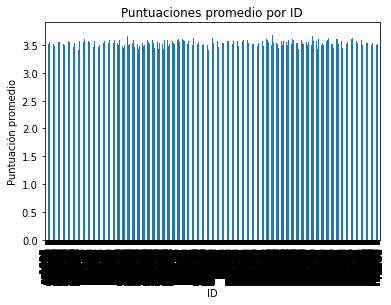

In [ ]:
# crear un gráfico de barras de las puntuaciones por ID
dfml.groupby('ID')['scored'].mean().plot(kind='bar')
plt.title('Puntuaciones promedio por ID')
plt.xlabel('ID')
plt.ylabel('Puntuación promedio')
plt.show()

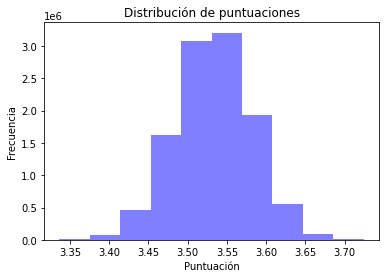

In [ ]:
# crear un histograma de las puntuaciones
plt.hist(dfml['scored'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntuaciones')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


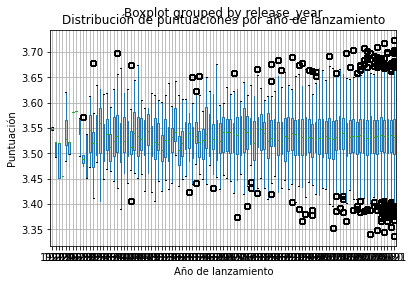

In [ ]:
# crear un boxplot de las puntuaciones por año de lanzamiento
dfml.boxplot(column='scored', by='release_year')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Puntuación')
plt.title('Distribución de puntuaciones por año de lanzamiento')
plt.show()

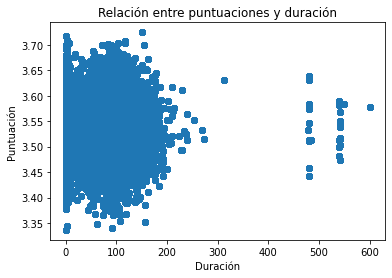

In [ ]:
# crear un scatterplot de las puntuaciones por duración
plt.scatter(dfml['duration_int'], dfml['scored'], alpha=0.5)
plt.xlabel('Duración')
plt.ylabel('Puntuación')
plt.title('Relación entre puntuaciones y duración')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


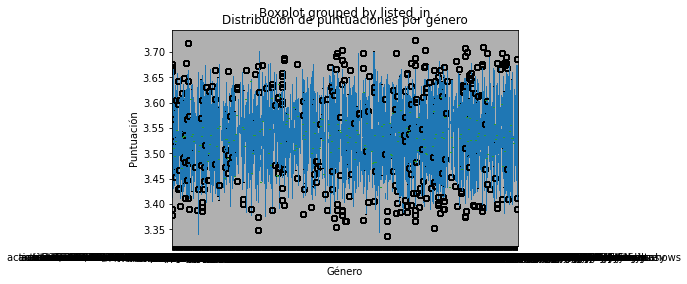

In [ ]:
# crear un boxplot de las puntuaciones por género
dfml.boxplot(column='scored', by='listed_in')
plt.xlabel('Género')
plt.ylabel('Puntuación')
plt.title('Distribución de puntuaciones por género')
plt.show()

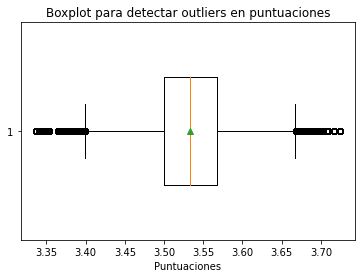

In [ ]:
# crear un boxplot de las puntuaciones para detectar outliers
plt.boxplot(dfml['scored'], vert=False, widths=0.5, showfliers=True, showmeans=True)
plt.xlabel('Puntuaciones')
plt.title('Boxplot para detectar outliers en puntuaciones')
plt.show()

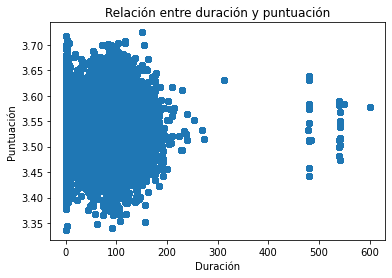

In [ ]:
# crear un scatterplot de la duración vs puntuación
plt.scatter(dfml['duration_int'], dfml['scored'], alpha=0.5)
plt.xlabel('Duración')
plt.ylabel('Puntuación')
plt.title('Relación entre duración y puntuación')
plt.show()


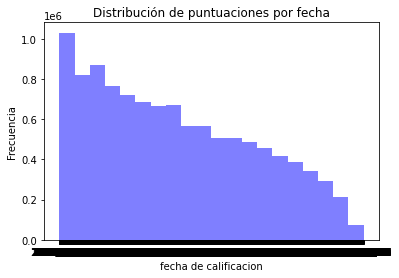

In [ ]:
# crear un histograma de la fecha de puntuacion de ls usuarios
plt.hist(dfml['timestamp'], bins=20, color='blue', alpha=0.5)
plt.xlabel('fecha de calificacion')
plt.ylabel('Frecuencia')
plt.title('Distribución de puntuaciones por fecha')
plt.show()

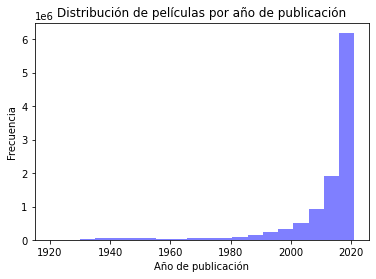

In [ ]:
# crear un histograma de la fecha de publicación de las películas
plt.hist(dfml['release_year'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Año de publicación')
plt.ylabel('Frecuencia')
plt.title('Distribución de películas por año de publicación')
plt.show()

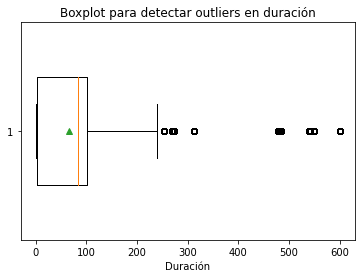

In [ ]:
# crear un boxplot de la duración para detectar outliers
plt.boxplot(dfml['duration_int'], vert=False, widths=0.5, showfliers=True, showmeans=True)
plt.xlabel('Duración')
plt.title('Boxplot para detectar outliers en duración')
plt.show()

Descargar archivo

In [ ]:
# Escribir archivo Parquet
df.to_parquet('dfCodificado.parquet')

In [ ]:
from google.colab import files

files.download('dfCodificado.parquet')

Modelo de recomendacion con un filtro basado en contenido, teniendo en cuenta  las categorias de las peliculas utilizando una tecnica de clustering y un algoritmo de K-means. Las técnicas para la evaluacion del modelo use el metodo del codo para definir el valos de K y silhuoette para comparar los clusters. 

In [ ]:
#cargar el archivo
df = pd.read_parquet("/content/dfCodificado.parquet")

Codificar columnas

In [ ]:
#codificar la columna "listed_in"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['listed_in_encoded'] = le.fit_transform(df['listed_in'])


In [ ]:
#codificar la columna "type"
le = LabelEncoder()
df['typen_encoded'] = le.fit_transform(df['type'])

In [ ]:
# codificar la columna "ID"
le = LabelEncoder()
df['ID_encoded'] = le.fit_transform(df['ID'])

In [ ]:
#  codificar la columna "userID"
le = LabelEncoder()
df['userId_encoded'] = le.fit_transform(df['userId'])

In [ ]:
df.head()

,type,title,cast,listed_in,platform,ID,duration_int,duration_type,userId,rating_y,movieId,scored,listed_in_encoded,typen_encoded,ID_encoded,userId_encoded
0,movie,the grand seduction,"brendan gleeson, taylor kitsch, gordon pinsent","comedy, drama",amazon,as1,113,min,543,5.0,as1,3.467131,652,0,0,540
1,movie,the grand seduction,"brendan gleeson, taylor kitsch, gordon pinsent","comedy, drama",amazon,as1,113,min,595,3.0,as1,3.467131,652,0,0,592
2,movie,the grand seduction,"brendan gleeson, taylor kitsch, gordon pinsent","comedy, drama",amazon,as1,113,min,611,3.0,as1,3.467131,652,0,0,608
3,movie,the grand seduction,"brendan gleeson, taylor kitsch, gordon pinsent","comedy, drama",amazon,as1,113,min,2523,3.5,as1,3.467131,652,0,0,2511
4,movie,the grand seduction,"brendan gleeson, taylor kitsch, gordon pinsent","comedy, drama",amazon,as1,113,min,3082,4.0,as1,3.467131,652,0,0,3069


Modelo k-means

In [ ]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#cargar el archivo
df = pd.read_parquet("/content/dfCodificado.parquet")

# Reducir la dimensionalidad del conjunto de datos
pca = PCA(n_components=2)
pandas_df_pca = pca.fit_transform(df[cluster_features])

# Seleccionar las características para entrenar el modelo
cluster_features = ["listed_in_encoded", "rating_y"]

# Escalar los datos
scaler = MinMaxScaler()
cluster_transformer = ColumnTransformer(transformers=[('num', scaler, cluster_features)])

# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_pipeline = Pipeline(steps=[('preprocessor', cluster_transformer), ('kmeans', kmeans)])
cluster_pipeline.fit(df)

# Agregar una columna 'cluster' al DataFrame original
df['cluster'] = kmeans.predict(pandas_df_pca)





Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['listed_in_encoded',
                                                   'rating_y'])])),
                ('kmeans', KMeans(n_clusters=3, random_state=0))])

evaluar el modelo 

metrica de silhouette

In [ ]:
from sklearn.metrics import silhouette_score

# Obtener las predicciones del modelo
labels = kmeans.predict(df[cluster_features])

# Calcular la métrica de silueta
silhouette_avg = silhouette_score(df[cluster_features], labels)
print("La métrica de silueta es:", silhouette_avg)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


metrica del codo

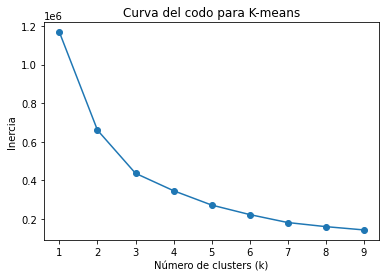

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Seleccionar las características para entrenar el modelo
cluster_features = ["listed_in_encoded", "rating_y"]

# Escalar los datos
scaler = MinMaxScaler()
cluster_transformer = ColumnTransformer(transformers=[('num', scaler, cluster_features)])

# Definir una lista de posibles valores de k
k_values = range(1, 10)

# Entrenar un modelo K-means para cada valor de k y guardar la inercia
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_pipeline = Pipeline(steps=[('preprocessor', cluster_transformer), ('kmeans', kmeans)])
    cluster_pipeline.fit(df)
    inertias.append(kmeans.inertia_)

# Graficar la curva del codo
plt.plot(k_values, inertias, '-o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Curva del codo para K-means')
plt.show()


In [ ]:
# Recomendar películas similares a la ingresada por el usuario
input_movie = "the grand seduction"
input_movie_data = df[df['title'] == input_movie]
input_movie_cluster = cluster_pipeline.predict(input_movie_data)

recommendations = df[df['cluster'] == input_movie_cluster[0]].sort_values('rating_y', ascending=False)[1:3]
print(recommendations['title'])


9285451                mubarakan
2284951    rosalie goes shopping
Name: title, dtype: object


In [ ]:
#funcion para la api
def recommend_movies(input_movie):
    num_recommendations = 2
    # Filtrar la información de la película ingresada por el usuario
    input_movie_data = df[df['title'] == input_movie]
    
    # Predecir el cluster de la película ingresada por el usuario
    input_movie_cluster = cluster_pipeline.predict(input_movie_data)
    
    # Filtrar las películas que pertenecen al mismo cluster que la película ingresada por el usuario
    recommendations = df[df['cluster'] == input_movie_cluster[0]]
    
    # Ordenar las películas por puntaje descendente
    recommendations = recommendations.sort_values('rating_y', ascending=False)
    
   # Devolver la lista de películas recomendadas, a partir del segundo elemento
    return recommendations['title'].iloc[1:num_recommendations+1].tolist()




In [ ]:
input_movie = "the grand seduction"
num_recommendations = 2
recommend_movies(input_movie, df, cluster_pipeline, num_recommendations)

['mubarakan', 'rosalie goes shopping']

In [ ]:
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
